# Scores

### Introduction:

This time you will create the data.

***Exercise based on [Chris Albon](http://chrisalbon.com/) work, the credits belong to him.***

### Step 1. Import the necessary libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql import types as T


### Step 2. Create the DataFrame that should look like the one below.

,first_name,last_name,age,female,preTestScore,postTestScore
0,Jason,Miller,42,0,4,25
1,Molly,Jacobson,52,1,24,94
2,Tina,Ali,36,1,31,57
3,Jake,Milner,24,0,2,62
4,Amy,Cooze,73,1,3,70


In [3]:
first_names = ['Jason', 'Molly', 'Tina', 'Jake', 'Amy']
last_names = ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze']
age = [42, 52, 36, 24, 73]
female = [0, 1, 1, 0, 1]
preTestScore = [4, 24, 31, 2, 3]
postTestScore = [25, 94 , 57, 62 ,70]

In [13]:
data = [values for i, values in enumerate(zip(first_names, last_names, age, female, preTestScore, postTestScore))]
data

[('Jason', 'Miller', 42, 0, 4, 25),
 ('Molly', 'Jacobson', 52, 1, 24, 94),
 ('Tina', 'Ali', 36, 1, 31, 57),
 ('Jake', 'Milner', 24, 0, 2, 62),
 ('Amy', 'Cooze', 73, 1, 3, 70)]

In [14]:
spark = SparkSession.builder\
                    .appName('scores')\
                    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/07/07 18:34:33 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [20]:
schema = T.StructType([
    T.StructField("first_name", T.StringType(), nullable=True),
    T.StructField("last_name", T.StringType(), nullable=True),
    T.StructField("age", T.IntegerType(), nullable=True),
    T.StructField("female", T.IntegerType(), nullable=True),
    T.StructField("preTestScore", T.IntegerType(), nullable=True),
    T.StructField("postTestScore", T.IntegerType(), nullable=True)
])

score = spark.createDataFrame(data, schema=schema)

In [24]:
df = pd.DataFrame(data, 
             columns=['first_name', 'last_name',
                      'age', 'female','preTestScore', 'postTestScore'])

df

,first_name,last_name,age,female,preTestScore,postTestScore
0,Jason,Miller,42,0,4,25
1,Molly,Jacobson,52,1,24,94
2,Tina,Ali,36,1,31,57
3,Jake,Milner,24,0,2,62
4,Amy,Cooze,73,1,3,70


### Step 3. Create a Scatterplot of preTestScore and postTestScore, with the size of each point determined by age
#### Hint: Don't forget to place the labels

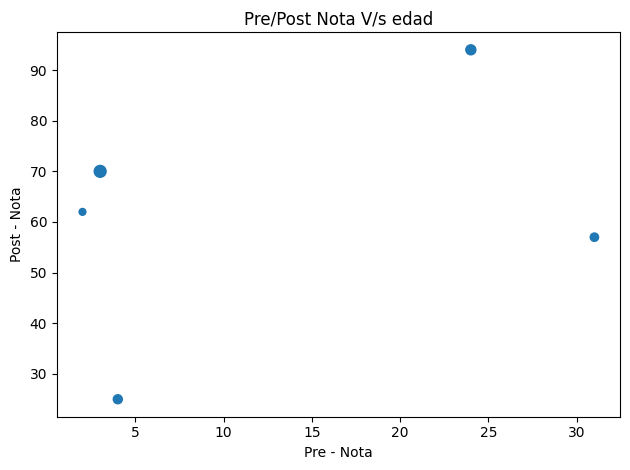

In [27]:

plt.scatter(x=df['preTestScore'], y=df['postTestScore'],s=df['age'])
plt.ylabel('Post - Nota')
plt.xlabel('Pre - Nota')
plt.title('Pre/Post Nota V/s edad')
plt.tight_layout()
plt.show()

### Step 4. Create a Scatterplot of preTestScore and postTestScore.
### This time the size should be 4.5 times the postTestScore and the color determined by sex

### BONUS: Create your own question and answer it.